In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import numpy as np
import math
import pandas as pd
dataset = pd.read_csv('/content/diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression



In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')


X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1:].values

X = imputer.fit_transform(X)
y = imputer.fit_transform(y)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1234)



In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
# y = sigmoid(w*x+b)
# w - weight vector
# x - input feature vector
# b - bias vector
# sigmoid(z) - 1/(1+e^(-z)) Use Math library for exponential

def sigmoid(x):
    return 1/(1+np.exp(-x))

class Logisticregression():

    def __init__(self,learn_rate,n_iter):                     #learn_rate and epochs are given as a input to system
        self.learn_rate = learn_rate
        self.n_iter = n_iter


    def fit_model(self, X, y):
                                                                    #X for feature and y for label
        self.l,self.b = X.shape
        self.Weights = np.zeros(self.b)
        self.Bias = 0
        self.X = X
        self.y = y
        self.gradient_descent()
        for i in range(self.n_iter):
            self.gradient_descent()
        return self


   # Backward Propagation of Weights using Gradient Descent Algorithm


    def gradient_descent(self):

        z = np.dot(self.X,self.Weights)+self.Bias
        sigm = sigmoid(z)
        y_hat = (sigm- self.y.T)
        y_hat = np.reshape(y_hat,self.l)
        diff_W = (np.dot(self.X.T,y_hat))/self.l
        diff_b = np.sum(y_hat)/self.l

        self.Weights = self.Weights - (np.dot(self.learn_rate,diff_W))
        self.Bias =  self.Bias - (np.dot(self.learn_rate,diff_b))

        return self

    def predictions(self,X):

        z = np.dot(X,self.Weights)+self.Bias
        z_final = sigmoid(z)
        y_predict = np.where(z_final>0.5,1,0)
        self.gradient_descent()
        return y_predict

    def accu_score(self, X, y):
        acc_score = []
        self.fit_model(X, y)

        for epoch in range(10):
            y_pred = self.predictions(X)
            acc = np.mean(y_pred == y)
            print(f"Epoch {epoch + 1}: Accuracy = {acc:.2f}")
            acc_score.append(acc)

        print("Training has been completed.")
        return acc_score




In [ ]:
epochs = 1000
model_created = Logisticregression(learn_rate=0.001,n_iter=epochs)          #Scratch Developed Logistic Regression Model

model_pretrained = LogisticRegression(max_iter=epochs,random_state=42)       #scikit learn logistic regression model

from sklearn.linear_model import SGDClassifier

model = SGDClassifier(loss="log_loss", random_state=42) # Change 'log' to 'log_loss'

In [ ]:
model_created.fit_model(X=X_train,y=y_train)
model_pretrained.fit(X_train,y_train)
model.fit(X_train,y_train)

SGDClassifier(loss='log_loss', random_state=42)

In [ ]:
acc_score = model_created.accu_score(X_train,y_train)
print(acc_score)

Epoch 1: Accuracy = 0.53
Epoch 2: Accuracy = 0.52
Epoch 3: Accuracy = 0.53
Epoch 4: Accuracy = 0.52
Epoch 5: Accuracy = 0.53
Epoch 6: Accuracy = 0.52
Epoch 7: Accuracy = 0.53
Epoch 8: Accuracy = 0.52
Epoch 9: Accuracy = 0.53
Epoch 10: Accuracy = 0.52
Training has been completed.
[0.5269286676781717, 0.5239365934917082, 0.5269286676781717, 0.5239365934917082, 0.5269286676781717, 0.5239365934917082, 0.5269286676781717, 0.5239365934917082, 0.5269286676781717, 0.5239365934917082]


In [ ]:
y_pred_c = model_created.predictions(X_test)

y_pred_p = model_pretrained.predict(X_test)

y_pred_y = model.predict(X_test)

In [ ]:
corr_c = 0
corr_p = 0
corr_y = 0
count = 0

for count in range(np.size(y_pred_c)):

    if y_test[count] == y_pred_c[count]:
        corr_c+=1
    if y_test[count] == y_pred_p[count]:
        corr_p+=1
    if y_test[count] == y_pred_y[count]:
        corr_y+=1

    count+=1

print("Accuracy on test by scratch model: ",(corr_c/count)*100)
print("Accuracy on test by sklearn model: ",(corr_p/count)*100)
print("Accuracy on test by Partial model: ",(corr_y/count)*100)

Accuracy on test by scratch model:  73.37662337662337
Accuracy on test by sklearn model:  77.27272727272727
Accuracy on test by Partial model:  70.77922077922078


[0.6514657980456026, 0.6726384364820847, 0.6905537459283387, 0.741042345276873, 0.5879478827361564, 0.6302931596091205, 0.744299674267101, 0.752442996742671, 0.7068403908794788, 0.6872964169381107]
[0.6514657980456026, 0.6726384364820847, 0.6905537459283387, 0.741042345276873, 0.5879478827361564, 0.6302931596091205, 0.744299674267101, 0.752442996742671, 0.7068403908794788, 0.6872964169381107]


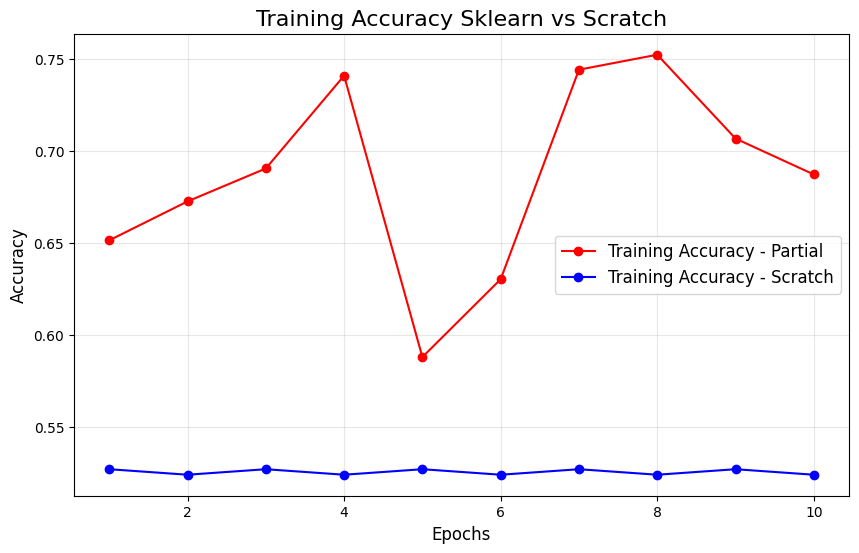

In [ ]:
train_acc=[]
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
epochs=10
for epoch in range(epochs):
    # Shuffle the data to mimic incremental learning
    X_train, y_train = shuffle(X_train, y_train, random_state=epoch)

    model.fit(X_train, y_train)  # Refit model
    y_train_pred = model.predict(X_train)
    acc = accuracy_score(y_train, y_train_pred)
    train_acc.append(acc)

print(train_acc)
print(train_acc)
plt.figure(figsize=(10,6))
plt.plot(range(1,epochs+1),train_acc,color='red',marker='o',label="Training Accuracy - Partial")
plt.plot(range(1,epochs+1),acc_score,color='blue',marker='o',label="Training Accuracy - Scratch")
plt.xlabel("Epochs",fontsize=12)
plt.ylabel("Accuracy",fontsize=12)
plt.title("Training Accuracy Sklearn vs Scratch",fontsize=16)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()